# ONLINE PAYMENT FRAUD DETECTION PAYMENT 

## PROBLEM DEFINITION

Clearly articulate the problem that is to be solved with your data mining.
How will the business benefit from your solution?

#### Blossom Bank wants to build  a Machine Learning model to predict online payment fraud.

A digital fraud solution can eliminate transactional concerns using machine learning. In turn, by recognizing loyal clients and taking on more orders, Blossom Bank can raise their revenue, they can enhance business plans and offer insightful client information.

The ML Model can:
- help with increased accuracy for classifying legitimate transactions vs fraudulent ones at a faster rate while looking for trends in data.
- enables faster trend identification and better data classification.
- help recoup lost income.
- help boost transparency and confidence.
- help with in simple and efficient dispute resolution with customers.

In [1]:
# import necessary libraries (analysis and visualisation)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA SET

Online Payment Fraud Detection dataset.
Its column references are: 
- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [2]:
#load the dataset

fraud_detection = pd.read_csv('Online Payment Fraud Detection.csv')

In [3]:
fraud_detection

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


## EXPLORATORY DATA ANALYSIS

An overview of the dataset

- Visualize relationships between the label and some key features.
- Explore correlations.
- Conduct univariate and multivariate analysis as much as is feasible

In [4]:
#the size of the dataset

fraud_detection.shape

(1048575, 10)

In [5]:
#print top 5 rows with the head() method

fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [6]:
#the tail of the data

fraud_detection.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [7]:
#the info of the data

fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [8]:
#the view the column of the data

fraud_detection.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [9]:
#statistical information of the data

fraud_detection.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [10]:
#checking the missing data

fraud_detection.isna().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [11]:
#checking the correlations

fraud_detection.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


<AxesSubplot:>

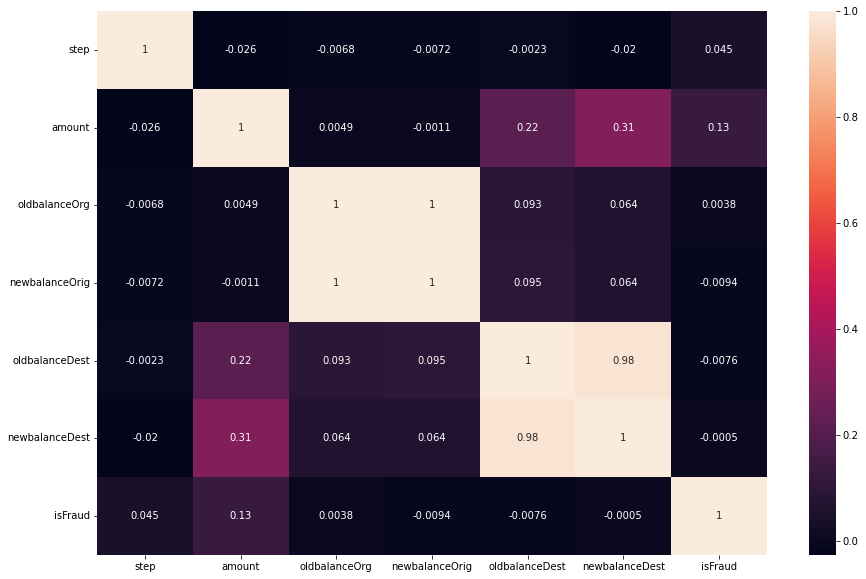

In [12]:
#visualize correlation using a seaborn heatmap

plt.figure(figsize=(15,10))

sns.heatmap(fraud_detection.corr(),annot=True)

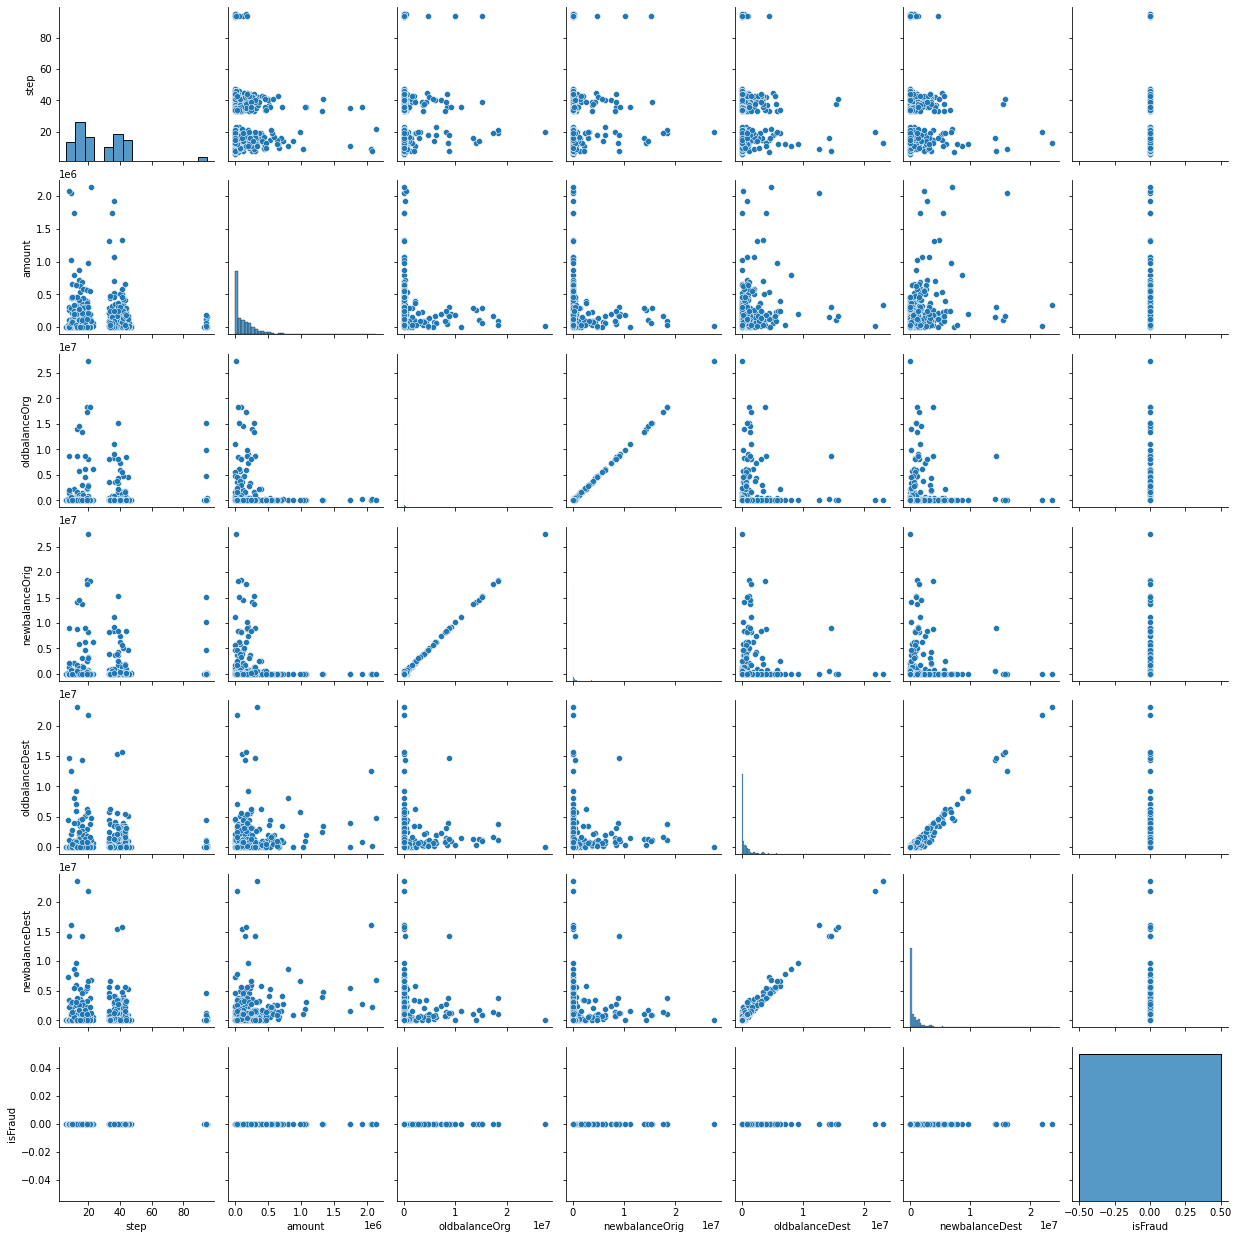

In [13]:
#visualize correlation a using seaborn pairplot

sns.pairplot(fraud_detection.sample(500))
plt.show()

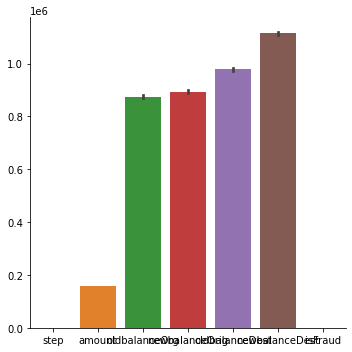

In [14]:
#visualize correlation using catplot

sns.catplot(data=fraud_detection,kind='bar')

In [15]:
#total amount involved

fraud_detection['amount'].sum()

166374223863.37

In [16]:
#total number of successful fraud and unsuccessful fraud
print('No of fraud transactions: {} \nNo of non-fraud transactions: {}'.format((fraud_detection.isFraud==1).sum(), (fraud_detection.isFraud==0).sum()))

No of fraud transactions: 1142 
No of non-fraud transactions: 1047433


In [17]:
fraud_detection.groupby('isFraud').type.count().sort_values(ascending=True)

isFraud
1       1142
0    1047433
Name: type, dtype: int64

In [18]:
fraud_detection['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [19]:
#total transaction by type

fraud_detection.groupby('type').amount.sum().sort_values(ascending=False)

type
CASH_OUT    6.876474e+10
TRANSFER    5.503644e+10
CASH_IN     3.859476e+10
PAYMENT     3.936097e+09
DEBIT       4.219599e+07
Name: amount, dtype: float64

In [20]:
#online transaction operations frequency

cat1 = fraud_detection.groupby('type').isFraud.count().sort_values(ascending=False)
cat1

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'Channels Used(Type) By Count')

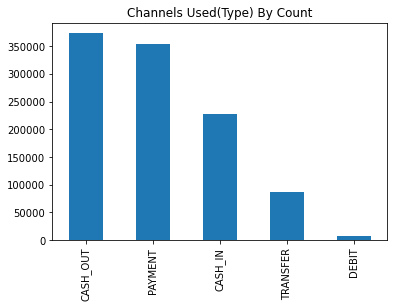

In [21]:
#using bar chart to visualize the frequency of type of transactions

fraud_detection.type.value_counts().plot.bar()
plt.title('Channels Used(Type) By Count',
             loc ='center', )

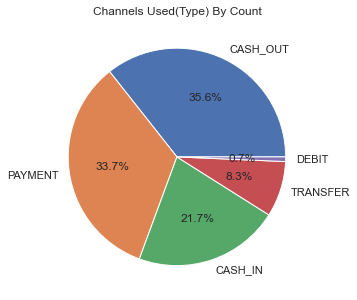

In [22]:
#using pie chart to visualize the type of transactions

#checking the ratio using a piechart for the highest fraud on the payment type
sns.set_theme(font_scale=1)

plt.figure(figsize=(5,5))
plt.pie(cat1,labels=cat1.index, autopct="%.1f%%")

plt.title('Channels Used(Type) By Count',
             loc ='center', )
plt.show()

Text(0.5, 1.0, "Boxplot of 'isFraud' against 'amount'")

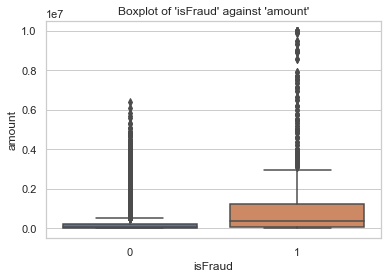

In [23]:
#Boxplot visual for isFraud against the total amount involved
sns.set_style('whitegrid')
sns.boxplot(x=fraud_detection.isFraud, y=fraud_detection.amount)

plt.title("Boxplot of 'isFraud' against 'amount'",
             loc ='center', )

Text(0.5, 1.0, "Stripplot of 'isFraud' against 'amount'")

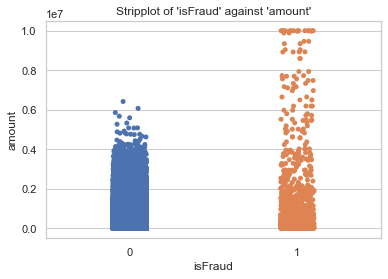

In [24]:
#Stripplot visual for isFraud against the total amount involved
sns.set_style('whitegrid')
sns.stripplot(x=fraud_detection.isFraud, y=fraud_detection.amount)

plt.title("Stripplot of 'isFraud' against 'amount'",
             loc ='center', )

Text(0.5, 1.0, "A combined plot of Stripplot and boxplot of 'isFraud' against 'amount'")

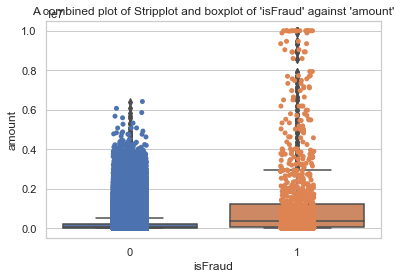

In [25]:
#visual for Stripplot and boxplot against the total amount involved
sns.set_style('whitegrid')
sns.boxplot(x=fraud_detection.isFraud, y=fraud_detection.amount)
sns.stripplot(x=fraud_detection.isFraud, y=fraud_detection.amount)

plt.title("A combined plot of Stripplot and boxplot of 'isFraud' against 'amount'",
             loc ='center', )

Text(0.5, 1.0, "Boxplot of 'type' against 'amount'")

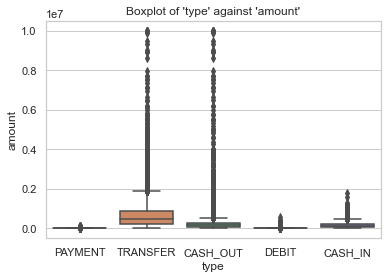

In [26]:
#Boxplot visual for the type of transaction involved
sns.set_style('whitegrid')
sns.boxplot(x=fraud_detection.type, y=fraud_detection.amount)

plt.title("Boxplot of 'type' against 'amount'",
             loc ='center', )

Text(0.5, 1.0, "Stripplot of 'type' against 'amount'")

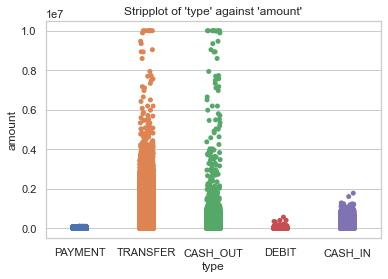

In [27]:
#Stripplot visual for the type of transaction involved
sns.set_style('whitegrid')
sns.stripplot(x=fraud_detection.type, y=fraud_detection.amount)

plt.title("Stripplot of 'type' against 'amount'",
             loc ='center', )

Text(0.5, 1.0, "A combined plot of Stripplot and boxplot of 'type' against 'amount'")

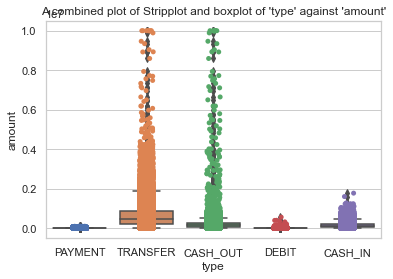

In [28]:
#visual for Stripplot and boxplot against the total amount involved
sns.set_style('whitegrid')
sns.boxplot(x=fraud_detection.type, y=fraud_detection.amount)
sns.stripplot(x=fraud_detection.type, y=fraud_detection.amount)

plt.title("A combined plot of Stripplot and boxplot of 'type' against 'amount'",
             loc ='center', )

Text(0.5, 1.0, "Barplot of 'type' against 'isFraud'")

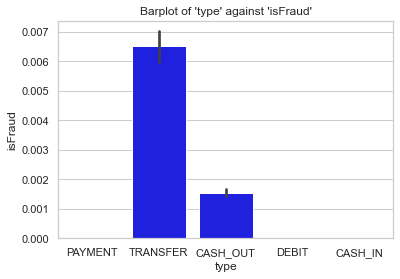

In [29]:
#Barplot visual of type against isFraud

sns.barplot(x=fraud_detection.type, y=fraud_detection.isFraud, color='blue')

plt.title("Barplot of 'type' against 'isFraud'",
             loc ='center', )

#### The type of transactions where Fraud if frequent are "Transfer" and "Cash_Out"

In [30]:
#average time used

fraud_detection['step'].mean()

26.966174093412487

Text(0.5, 1.0, "Violinplot of 'isFraud' against 'step'")

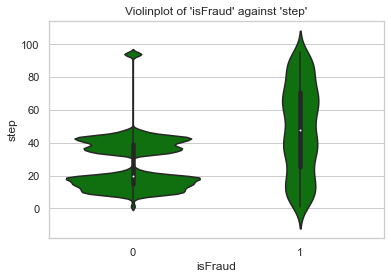

In [31]:
#visual of Violinplot for isFraud against the time

sns.violinplot(x=fraud_detection.isFraud, y=fraud_detection.step, color ='green')

plt.title("Violinplot of 'isFraud' against 'step'",
             loc ='center', )

Text(0.5, 1.0, "Violinplot of 'type' against 'step'")

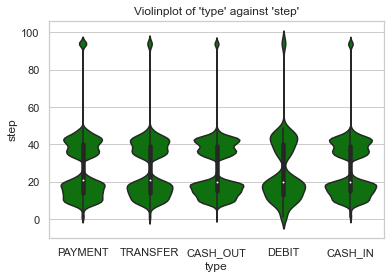

In [32]:
#visual of Violinplot for transaction type against the time

sns.violinplot(x=fraud_detection.type, y=fraud_detection.step, color ='green')

plt.title("Violinplot of 'type' against 'step'",
             loc ='center', )

Text(0.5, 1.0, "Violinplot of 'isFraud' against 'amount'")

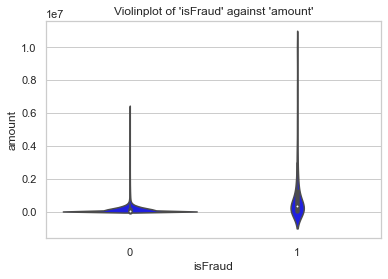

In [33]:
#visual of Violinplot for isFraud against the amount

sns.violinplot(x='isFraud', y='amount', data=fraud_detection, color='blue')

plt.title("Violinplot of 'isFraud' against 'amount'",
             loc ='center', )

Text(0.5, 1.0, "Violinplot of 'type' against 'amount'")

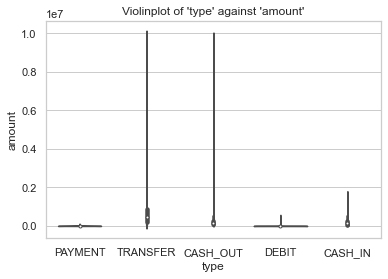

In [34]:
#visual of Violinplot for type against the amount

sns.violinplot(x='type', y='amount', data=fraud_detection, color='blue')

plt.title("Violinplot of 'type' against 'amount'",
             loc ='center', )

In [35]:
#total transactions from sender

fraud_detection.groupby('nameOrig').amount.sum().sort_values(ascending=False)[::]

nameOrig
C538142346     10000000.00
C792651637     10000000.00
C1237313447    10000000.00
C53057884      10000000.00
C1439740840    10000000.00
                  ...     
C402638409            0.30
C2021685600           0.26
C417208094            0.20
C570870355            0.14
C938188576            0.10
Name: amount, Length: 1048317, dtype: float64

In [36]:
#top 20 senders by total transactions

s = fraud_detection.groupby('nameOrig').amount.sum().sort_values(ascending=False)[:20]
s

nameOrig
C538142346     10000000.00
C792651637     10000000.00
C1237313447    10000000.00
C53057884      10000000.00
C1439740840    10000000.00
C7162498       10000000.00
C1843531771    10000000.00
C1438388258    10000000.00
C2050703310    10000000.00
C824646662     10000000.00
C1079335762    10000000.00
C416779475     10000000.00
C351297720     10000000.00
C29118015      10000000.00
C840795008      9977761.05
C154757729      9977761.05
C1071702423     9887819.06
C1548903046     9887819.06
C851016578      9465988.82
C91276418       9465988.82
Name: amount, dtype: float64

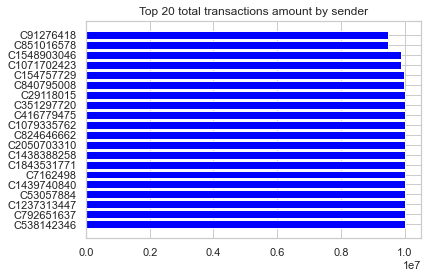

In [37]:
#use horizontal bar chart to visualize top 20 senders
#use the series index as vertical axis and series values as horizontal axis of the barh() plot
plt.title('Top 20 total transactions amount by sender',
             loc ='center', )
plt.barh(y=s.index, width=s, color='blue')
plt.rcParams["figure.figsize"] = (15,10)

plt.show()

In [38]:
#top 15 transactions by time

fraud_detection.groupby('step').amount.sum().sort_values(ascending=False)[:15]

step
18    7.255072e+09
15    7.183723e+09
10    7.124215e+09
17    7.116326e+09
19    7.103847e+09
11    7.015066e+09
9     7.008379e+09
16    6.960085e+09
14    6.874187e+09
13    6.847541e+09
36    6.832214e+09
12    6.754285e+09
43    6.511754e+09
42    6.360574e+09
37    5.962020e+09
Name: amount, dtype: float64

In [39]:
#average time used to defraud a customers

fraud_detection.groupby('nameOrig').step.mean().sort_values(ascending=False)[::]

nameOrig
C1834358749    95.0
C436398820     95.0
C2049648206    95.0
C74127546      95.0
C1725002049    95.0
               ... 
C722513129      1.0
C1798861270     1.0
C1061018585     1.0
C722417467      1.0
C1108889615     1.0
Name: step, Length: 1048317, dtype: float64

In [40]:
#top 10 earners

e = fraud_detection.groupby('nameDest').newbalanceDest.sum().sort_values(ascending=False)[:10]
e

nameDest
C1590550415    1.853100e+09
C97730845      1.735890e+09
C803116137     1.551000e+09
C1883840933    1.460800e+09
C214774813     1.267900e+09
C248609774     1.221063e+09
C1262822392    1.205500e+09
C667346055     1.184974e+09
C665576141     1.182799e+09
C1255024717    1.174959e+09
Name: newbalanceDest, dtype: float64

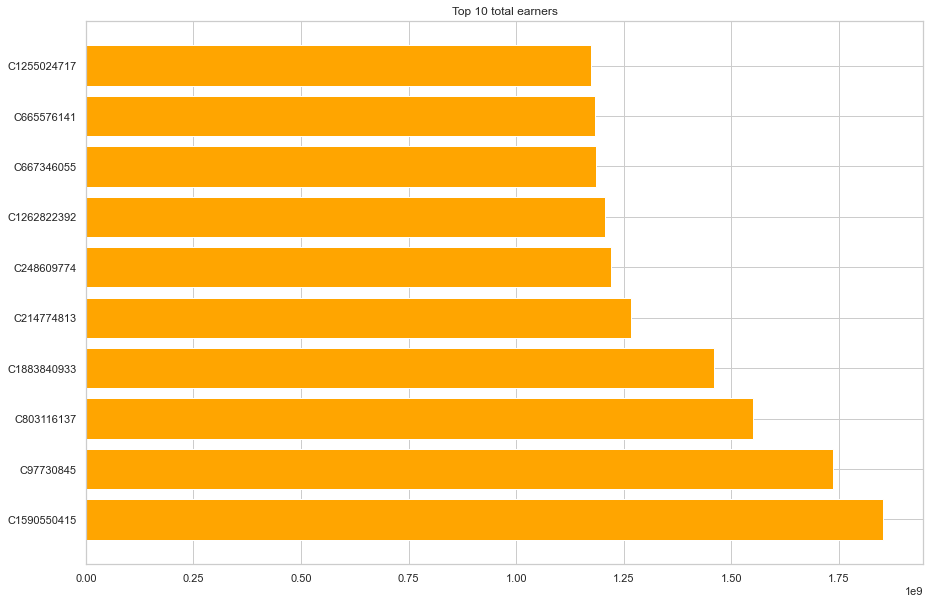

In [41]:
#use horizontal bar chart to visualize top 10 earners
#use the series index as vertical axis and series values as horizontal axis of the barh() plot
plt.title('Top 10 total earners',
             loc ='center', )
plt.barh(y=e.index, width=e, color='orange')
plt.rcParams["figure.figsize"] = (15,10)

plt.show()

In [42]:
#online transaction with the highest amount received

r = fraud_detection.groupby('type').newbalanceDest.sum().sort_values(ascending=False)
r

type
CASH_OUT    6.106446e+11
CASH_IN     3.133747e+11
TRANSFER    2.346707e+11
DEBIT       9.630203e+09
PAYMENT     0.000000e+00
Name: newbalanceDest, dtype: float64

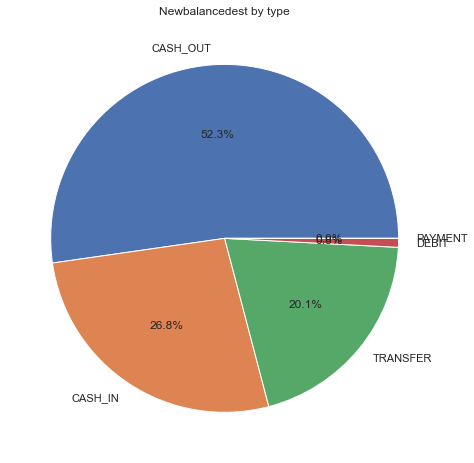

In [43]:
#using pie chart to visualize the type of online transaction with the highest amount received

sns.set_theme(font_scale=1)

plt.figure(figsize=(8,8))
plt.pie(r,labels=r.index, autopct="%.1f%%")

plt.title('Newbalancedest by type',
             loc ='center', )
plt.show()

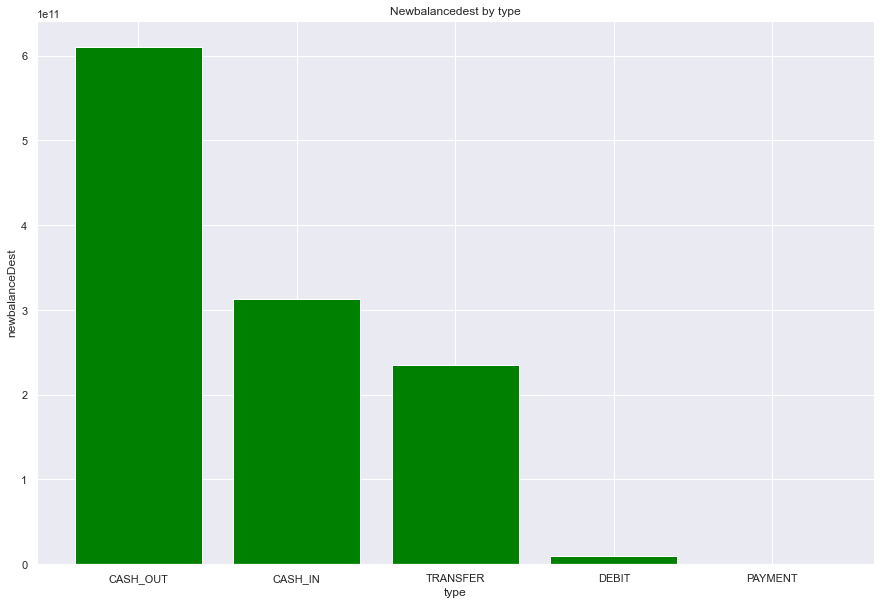

In [44]:
#using bar chart to visualize the type of online transaction with the highest amount received

plt.bar(x=r.index, height=r,color = 'green')

plt.title('Newbalancedest by type')
plt.xlabel('type')
plt.ylabel('newbalanceDest')
plt.rcParams["figure.figsize"] = (10,5)

plt.show()


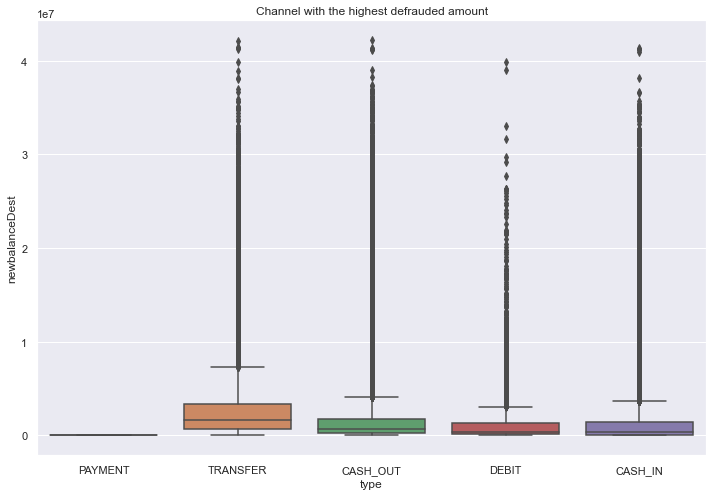

In [45]:
#use vertical boxplot to visualize highest amount defrauded​ by type
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.title('Channel with the highest defrauded amount')
sns.boxplot(x='type', y='newbalanceDest', data=fraud_detection)

plt.show()

In [46]:
#customers that reported the fraud

fraud_detection.groupby('nameOrig').isFraud.count().sort_values(ascending=False)[::]

nameOrig
C664297940     2
C1876692952    2
C1095346997    2
C1039623203    2
C118275378     2
              ..
C164472116     1
C1644722625    1
C1644726015    1
C1644728428    1
C999999254     1
Name: isFraud, Length: 1048317, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

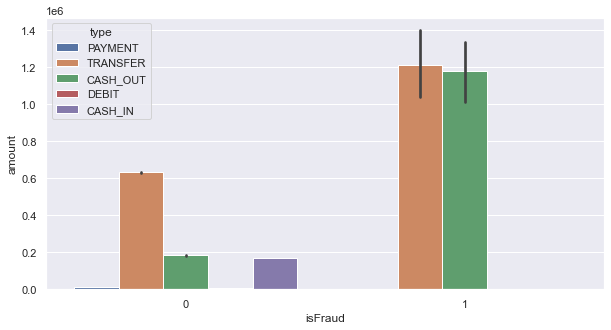

In [47]:
#average amount of fraud based on transaction type

sns.barplot(
    x='isFraud', 
    y='amount', 
    data=fraud_detection, 
    hue='type')

<AxesSubplot:xlabel='type', ylabel='amount'>

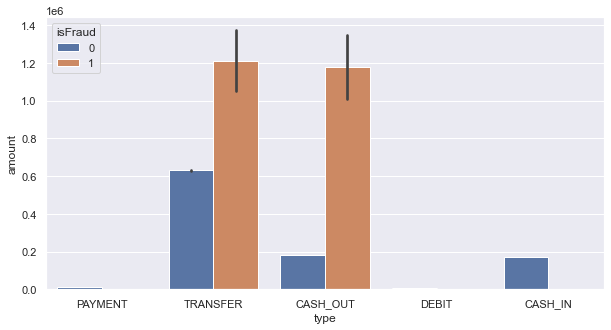

In [48]:
#average amount of fraud based on transaction type

sns.barplot(
    x='type', 
    y='amount', 
    data=fraud_detection, 
    hue='isFraud')

### Using Multivariate analysis, it can be inferred that
- the average amount defrauded falls between 1,150,000 and 2,000,000;
- the type of transaction used to defraud is "Transfer" and " Cash out" platforms. 

<AxesSubplot:xlabel='isFraud', ylabel='step'>

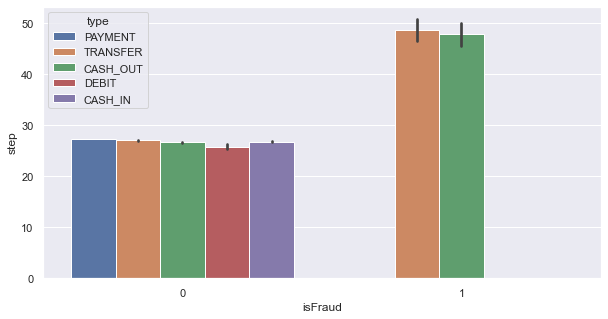

In [49]:
#average time of fraud based on transaction type

sns.barplot(
    x='isFraud', 
    y='step', 
    data=fraud_detection, 
    hue='type')

<AxesSubplot:xlabel='type', ylabel='step'>

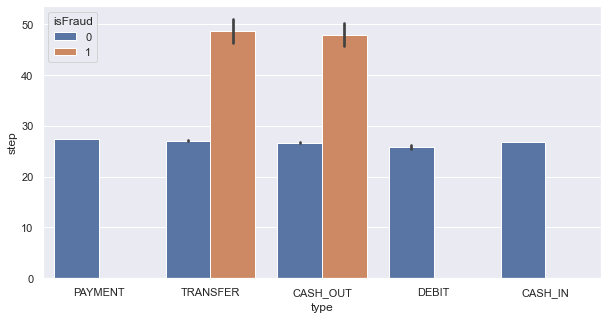

In [50]:
#average time of fraud based on transaction type

sns.barplot(
    x='type', 
    y='step', 
    data=fraud_detection, 
    hue='isFraud')

### Using Multivariate analysis, it can be inferred that
- the average time in fraud occurs is about the 50th hour;
- fraud is carried out on the "Transfer" and " Cash out" platform transaction type.. 

## FEATURE ENGINEERING

The act of choosing, modifying, and converting unprocessed data into features that can be applied in supervised learning is known as feature engineering.
A machine learning technique called feature engineering uses data to generate new variables that aren't present in the training set. With the aim of streamlining and accelerating data transformations while also improving model accuracy, it can generate new features for both supervised and unsupervised learning.

- Encoding categorical variables
- Create new features from existing features where necessary, depending on insights from your EDA.

### One-Hot Encoding

In [51]:
#Select categorical variable
#use pd.get_dummies() for one hot encoding

categorical = ['type']
categorical_dummies = pd.get_dummies(fraud_detection[categorical])
categorical_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [52]:
#add the encoded variable to the main data using concatenation
#view shape of dataset
#view head of data set

fraud_detection = pd.concat([fraud_detection,categorical_dummies], axis=1)
print(fraud_detection.shape)
fraud_detection.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [53]:
#drop/remove the categorical column i.e. type
#view shape of dataset
#view head of data set

fraud_detection = fraud_detection.drop(categorical,axis=1)
print(fraud_detection.shape)
fraud_detection.head()

(1048575, 14)


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


## MODEL SELECTION
- Train and test at least 2 supervised learning model

### Selecting Features

- Feature selection is where you choose the features that you will use in trainning the model.

In [54]:
#y - testing data

y = fraud_detection.isFraud

In [55]:
#X - training data

X=fraud_detection.drop(["nameOrig", "nameDest", "isFraud"], axis=1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


### Preparing the Models

- Import  the necessary libraries

In [56]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Train - Test Split

In [57]:
#split into training and validation sets using a 40% split ratio
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)

#### Train and Test the Model

In [58]:
# TODO: initialize logistic regression
LR = LogisticRegression(random_state=42)

In [59]:
#TODO: initialize random forest
RF = RandomForestClassifier(random_state=42)

In [60]:
#TODO: initialize decision tree
DC = DecisionTreeClassifier(random_state=42)

In [61]:
#TODO: initialize k neighbors
KN = KNeighborsClassifier()

In [62]:
#create list of your model names
models = [LR,KN, DC,RF]

In [63]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_valid,y_valid):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(models.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction,y_valid))

In [64]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)


For LogisticRegression, Accuracy score is 0.9989986410128031 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419159
           1       0.33      0.55      0.41       271

    accuracy                           1.00    419430
   macro avg       0.67      0.77      0.71    419430
weighted avg       1.00      1.00      1.00    419430


For KNeighborsClassifier, Accuracy score is 0.9992895119567031 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419125
           1       0.51      0.74      0.60       305

    accuracy                           1.00    419430
   macro avg       0.75      0.87      0.80    419430
weighted avg       1.00      1.00      1.00    419430


For DecisionTreeClassifier, Accuracy score is 0.9995899196528623 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419007
           1       0.78      0.82      

## MODEL EVALUATION
- Analyse the results of your trained model.
- What metrics are most important for the problem? For instance, should the business be more concerned with better results on false negatives or true positives?

### Analysis of Result of Trained Model

#### 
- Random Forest Classifier has the best Accuracy score and Recall score.
- Decision Tree Classifier has the best Precision score.
- Logistic Regression has the least Precision score, Recall score and Accuracy score.

#### 

### Important Metrics for the problem.

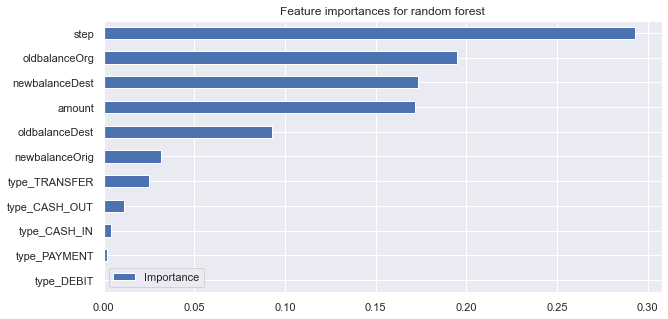

In [65]:
#get feature importances for Random Forest
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[::].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [66]:
#get these top 10 importances
RF_importances[::].sort_values(by='Importance').index.values

array(['type_DEBIT', 'type_PAYMENT', 'type_CASH_IN', 'type_CASH_OUT',
       'type_TRANSFER', 'newbalanceOrig', 'oldbalanceDest', 'amount',
       'newbalanceDest', 'oldbalanceOrg', 'step'], dtype=object)

#### 
From the important features of the Randon Forest Model analysed above, it can be infered that the top four (4) important features are:

    1. Step: which represents the unit of time where one step equals one hour.
       If reported in a timely manner, fraud can be stopped.
    2. OldbalanceOrg: the balance before the transaction takes place.
       A hold should be imposed on an account when there is an unusual outflow until the source of the outflow is confirmed,                 according to a bank policy on anomalies in customer accounts.
    3. NewbalDest: the new balance of the recepient after the transaction.
       A hold should be imposed on an account when there is an unusual inflow until the source of the inflow is confirmed,                 according to a bank policy on anomalies in customer accounts.
    4. Amount: the amount of the transaction.
       If unusual amount is being paid or withdrawn, the amount should be flagged until confirmation from customers, both 
            the sender and the receiver.